#Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle as pkl
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score

In [2]:
# importing the dataset
medical_expenses =pd.read_csv('/content/expenses.csv')

In [3]:
#checking the first 5 rows
medical_expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking the rows and columns of the dataset
medical_expenses.shape

(1338, 7)

In [5]:
#checking the statistical distributions of the dataset
medical_expenses.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# checking the dataset data type
medical_expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking for missing values
medical_expenses.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Assumptions

Plotting the distribution of the various features

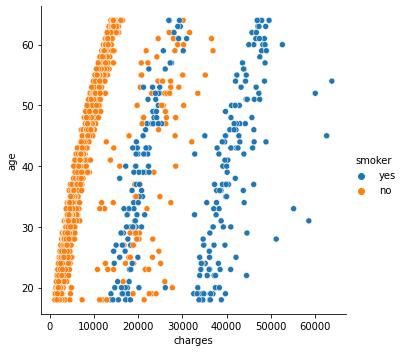

In [8]:
sns.relplot(x="charges", y="age", hue="smoker", data=medical_expenses);

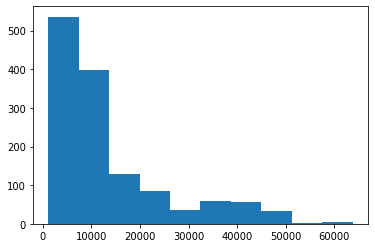

In [9]:
#plt.figure(figsize=(6, 6))
plt.hist(medical_expenses.charges)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


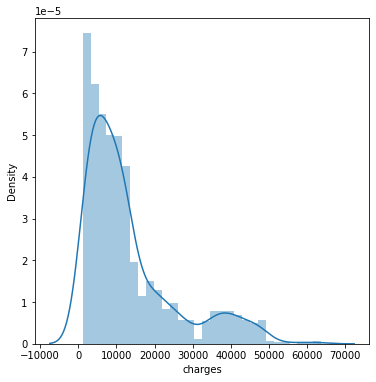

In [10]:
# Distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(medical_expenses.charges)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


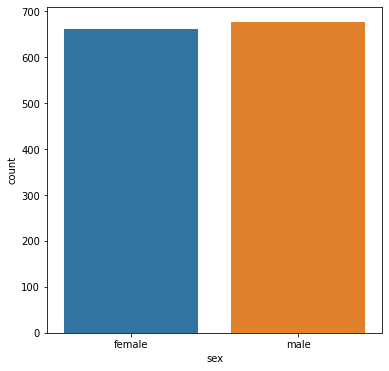

In [11]:
# Distribution of sex
plt.figure(figsize=(6,6))
sns.countplot(medical_expenses.sex)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


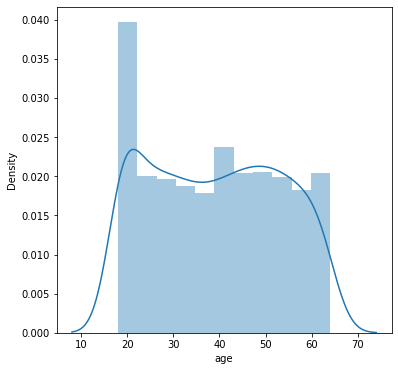

In [12]:
# Distribution of age
plt.figure(figsize=(6,6))
sns.distplot(medical_expenses.age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


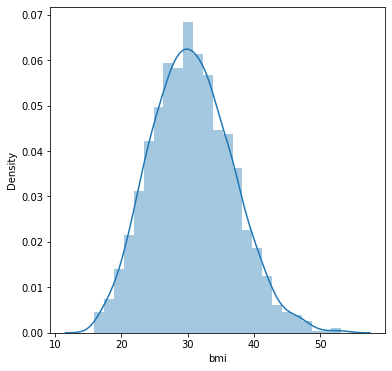

In [13]:
## Distribution of bmi
plt.figure(figsize=(6,6))
sns.distplot(medical_expenses.bmi)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


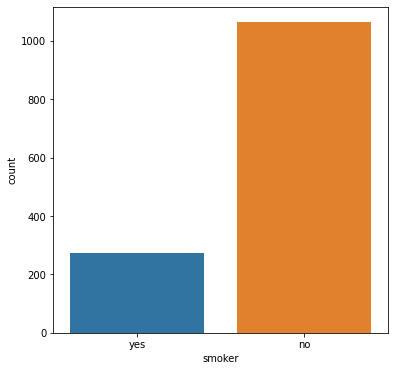

In [14]:
# Distribution of smoker
plt.figure(figsize=(6,6))
sns.countplot(medical_expenses.smoker)

In [15]:
#checking the first 5 rows
medical_expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Encoding the categorical labels Using LabelEncoder

sex

smoker


region

In [16]:
LE = LabelEncoder()

In [17]:
medical_expenses['sex'] = LE.fit_transform(medical_expenses['sex'])
medical_expenses['smoker'] = LE.fit_transform(medical_expenses['smoker'])
medical_expenses['region'] = LE.fit_transform(medical_expenses['region'])

In [18]:
medical_expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
medical_expenses['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [20]:
#separating the dataset into features and target
X = medical_expenses.drop(columns='charges',axis=1)
Y = medical_expenses['charges']

In [45]:
print(X)


[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


In [46]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#Implemeting the cross validation


Compare the performance of different models

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [53]:
# list of models
models = [LinearRegression(),Lasso(), RandomForestRegressor(n_estimators=100)]

In [66]:
Names = ['LNR','Lass','RNFreg']

In [54]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [55]:
compare_models_cross_validation()

Cross Validation accuracies for  LinearRegression() =   [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Accuracy % of the  LinearRegression() 74.73
----------------------------------------------
Cross Validation accuracies for  Lasso() =   [0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
Accuracy % of the  Lasso() 74.73
----------------------------------------------
Cross Validation accuracies for  RandomForestRegressor() =   [0.85278214 0.77299815 0.87013657 0.83083989 0.85136577]
Accuracy % of the  RandomForestRegressor() 83.56
----------------------------------------------


#Splitting the data into Training and Test split

In [57]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)


In [58]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#Standardizing the dataset using a standard scaler

In [25]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)
#scaler.fit(X)


StandardScaler()

In [60]:
X_train = scaler.transform(X_train)
#X = scaler.transform(X)

In [61]:
X_test = scaler.transform(X_test)

In [62]:
print(X_train)

[[-1.33631918 -1.01886959 -1.41805377 -0.93004238 -0.50729114 -1.3755987 ]
 [-0.18052529  0.98147988  0.03017623  1.56197434 -0.50729114 -0.47148899]
 [ 1.33645421 -1.01886959  0.39886179 -0.93004238 -0.50729114  1.33673044]
 ...
 [ 1.55316556  0.98147988  2.10558593 -0.93004238 -0.50729114  1.33673044]
 [ 0.83079438 -1.01886959 -0.81075823 -0.09937014 -0.50729114  1.33673044]
 [ 1.33645421 -1.01886959  0.28204232 -0.09937014 -0.50729114 -1.3755987 ]]


In [63]:
print(X_test)

[[-1.19184495  0.98147988 -1.13470442 -0.93004238 -0.50729114 -1.3755987 ]
 [ 1.11974285 -1.01886959 -0.1429817  -0.93004238 -0.50729114 -1.3755987 ]
 [ 0.75855726  0.98147988 -0.53652246 -0.09937014 -0.50729114 -1.3755987 ]
 ...
 [ 1.55316556 -1.01886959 -0.26891474 -0.93004238  1.97125461 -0.47148899]
 [ 0.61408302  0.98147988  1.09315054  0.7313021  -0.50729114  0.43262072]
 [ 0.83079438  0.98147988 -0.97728811  0.7313021   1.97125461 -0.47148899]]


In [68]:
for i in range(len(models)):
  X_test_predict = models[i].predict(X_test)
  X_test_accuracy = metrics.r2_score(Y_test, X_test_predict)
  print('Test accuracy :', Names[i], X_test_accuracy)
  

Test accuracy : LNR 0.7445422986536503
Test accuracy : Lass 0.7445411061109249
Test accuracy : RNFreg 0.8350340472410969


In [40]:
medical_expenses.to_csv('med4.csv',index=False)

#Building apredictive system

In [69]:
input_data = (19,0,27.9,0,1,3)
inp_data_np = np.asarray(input_data)

In [70]:
inp_data_reshaped = inp_data_np.reshape(1, -1)

In [71]:
inp_data_reshaped = scaler.transform(inp_data_reshaped)

In [72]:
prediction = models[0].predict(inp_data_reshaped)
print(prediction)

[145188.64180679]
